In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('capstone2_df.csv', index_col=[0]) 
CA_df = pd.read_csv('CA_deaths_data.csv', index_col=[0])
CA_months = pd.read_csv('CA_bymonth.csv', index_col=[0])
df.head(5)

,Date,State,Cases,Deaths,Percent African American,Percent American Indian And Alaska Native,Percent Asian,Percent Native Hawaiian And Other Pacific Islander,Percent Two Or More Races,Percent Hispanic Or Latino,Percent White Not Hispanic Or Latino,Median Household Income,Percent Persons Below Poverty Level
0,2022-09-24,Alabama,1517904,20395,26.8,0.7,1.5,0.1,1.8,4.6,65.3,50536.0,15.5
1,2022-09-24,Alaska,303559,1321,3.7,15.6,6.5,1.4,7.5,7.3,60.2,77640.0,10.1
3,2022-09-24,Arizona,2268158,31326,5.2,5.3,3.7,0.3,2.9,31.7,54.1,58945.0,13.5
4,2022-09-24,Arkansas,949582,12080,15.7,1.0,1.7,0.4,2.2,7.8,72.0,47597.0,16.2
5,2022-09-24,California,11230511,95896,6.5,1.6,15.5,0.5,4.0,39.4,36.5,75235.0,11.8


In [3]:
df.dtypes

Date                                                   object
State                                                  object
Cases                                                   int64
Deaths                                                  int64
Percent African American                              float64
Percent American Indian And Alaska Native             float64
Percent Asian                                         float64
Percent Native Hawaiian And Other Pacific Islander    float64
Percent Two Or More Races                             float64
Percent Hispanic Or Latino                            float64
Percent White Not Hispanic Or Latino                  float64
Median Household Income                               float64
Percent Persons Below Poverty Level                   float64
dtype: object

In [29]:
 df.isna().sum().sum()

50

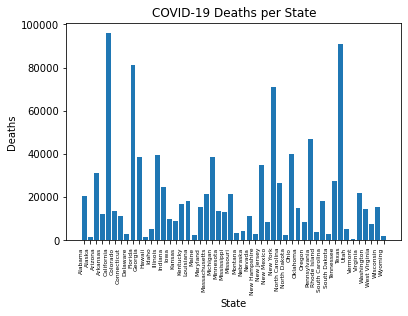

In [5]:
plt.bar(df['State'], df['Deaths'], align='center', alpha=1)
plt.ylabel('Deaths')
plt.xlabel('State')
plt.title('COVID-19 Deaths per State')
plt.tick_params(axis='x', labelsize=6)
plt.xticks(rotation=90, ha='right')
plt.show()

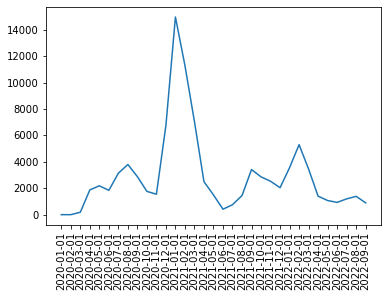

In [6]:
#CA_months.head()
plt.plot(CA_months['month_year'],CA_months['deaths_by_day'])
plt.xticks(rotation=90)
plt.show()
#two highest peaks were in the first three months of 2021 and 2022

In [7]:
#find month/year with peak deaths
CA_months.iloc[CA_months['deaths_by_day'].idxmax()]

month_year       2021-01-01
deaths_by_day       14963.0
Name: 12, dtype: object

In [8]:
#find top 5 month/year with peak deaths 
CA_months.sort_values('deaths_by_day',ascending=False)
#top 3 deaths by month were in the beginning of 2021... what events could have led to this?

,month_year,deaths_by_day
12,2021-01-01,14963.0
13,2021-02-01,11285.0
14,2021-03-01,7047.0
11,2020-12-01,6756.0
25,2022-02-01,5297.0
7,2020-08-01,3798.0
24,2022-01-01,3558.0
26,2022-03-01,3454.0
20,2021-09-01,3415.0
6,2020-07-01,3139.0


<AxesSubplot:>

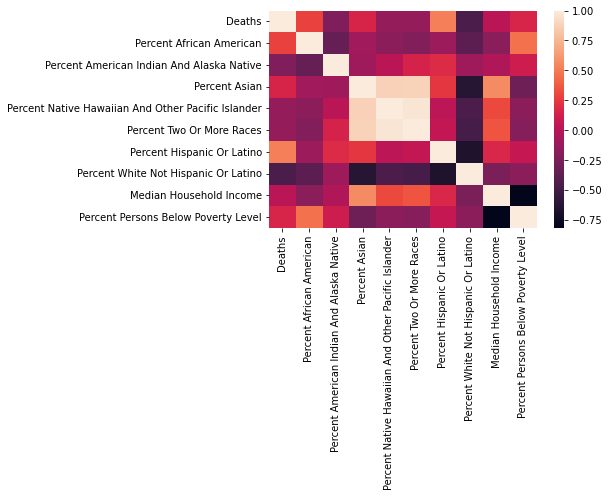

In [23]:
#investigate correlation between macroeconomic/demographic features/deaths
cor_map_df = df.loc[:, ~df.columns.isin(['Date', 'State','Cases'])]
cor_map_deaths = cor_map_df.corr()
round(cor_map_deaths, 2)
sns.heatmap(cor_map_deaths)

In [35]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df['State']=df['State'].replace('',np.nan).astype(float)
df = df.fillna(0)

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['State', 'Deaths']])
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df.State, df.Deaths, c=df.c, alpha = 0.6, s=10)

TypeError: 'method' object is not subscriptable

In [ ]:
#use lasso from scikitlearn to see feature with larget coefficient